In [122]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from easygui import * 
import os
from PIL import Image, ImageTk
from itertools import count 
import tkinter as tk
import string

In [123]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import soundfile as sf

In [124]:
from IPython.display import display

In [242]:
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

freq = 40000
duration = 5
print("Listening")
recording = sd.rec(int(duration * freq), samplerate=freq, channels=1)
sd.wait()
print('Saving')
write("recording8.wav", freq, recording)

Listening
Saving


In [243]:
scale_file = "recording8.wav"

In [244]:
scale, sr = librosa.load(scale_file)

In [245]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=1000)

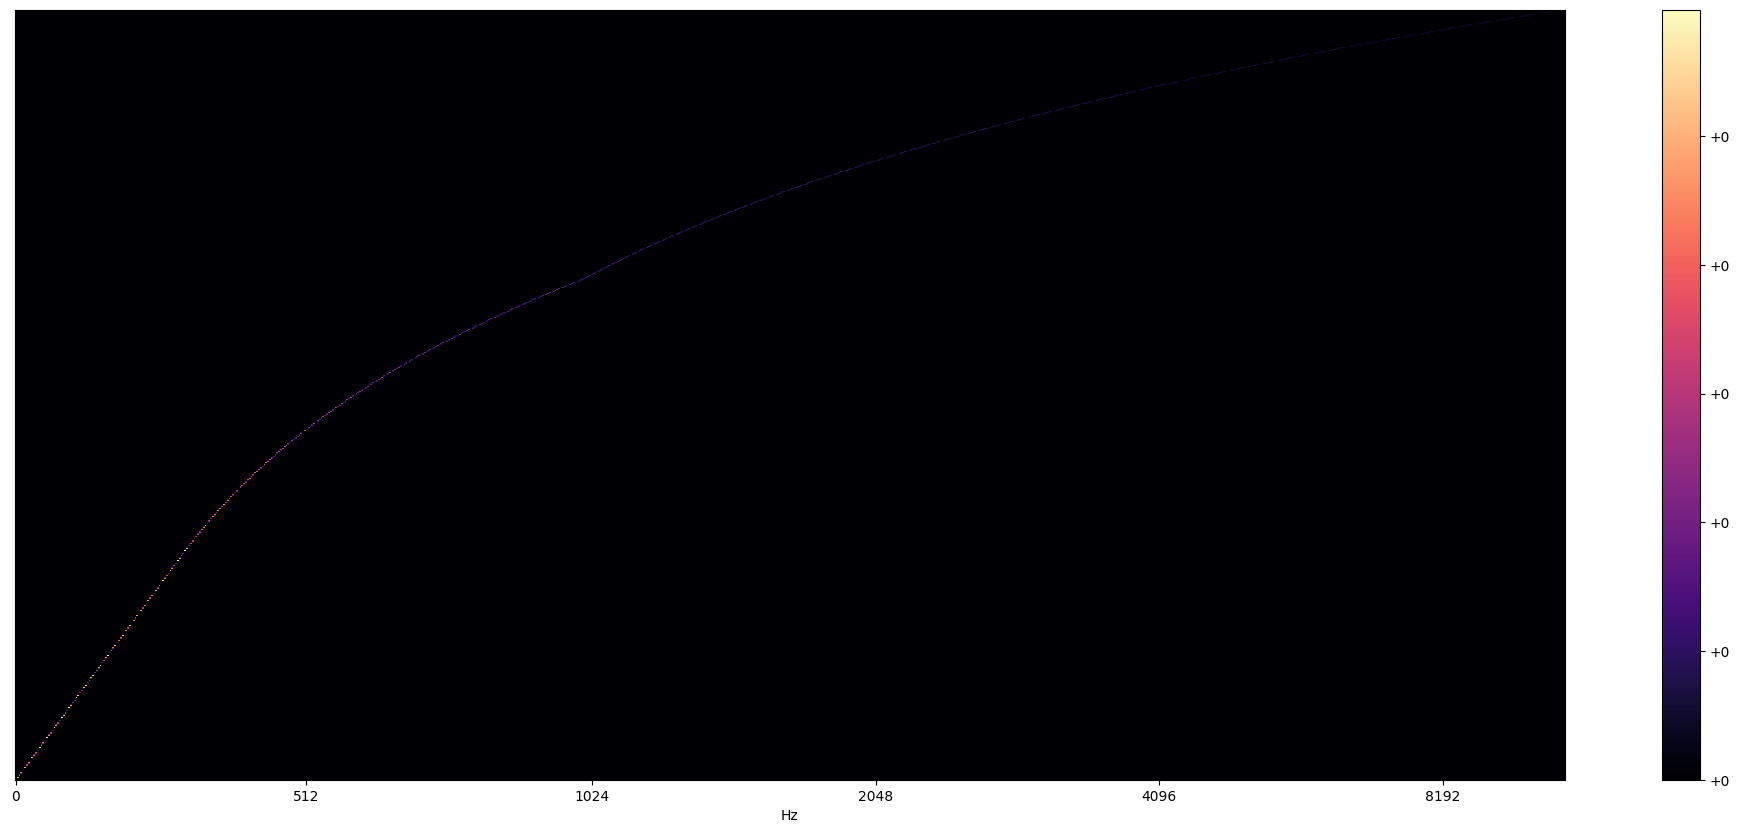

In [246]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks, sr=sr,x_axis="mel")
plt.colorbar(format="%+2.f")
plt.show()

In [247]:
mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=2048, hop_length=512, n_mels=1000)

C:\Users\LENOVO001\AppData\Local\Temp\ipykernel_15376\781457356.py:1: FutureWarning: Pass y=[ 1.7666237e-06 -1.7362760e-05 -2.0189896e-07 ... -1.9611556e-03
 -2.0334290e-03 -2.3289470e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=2048, hop_length=512, n_mels=1000)


In [248]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

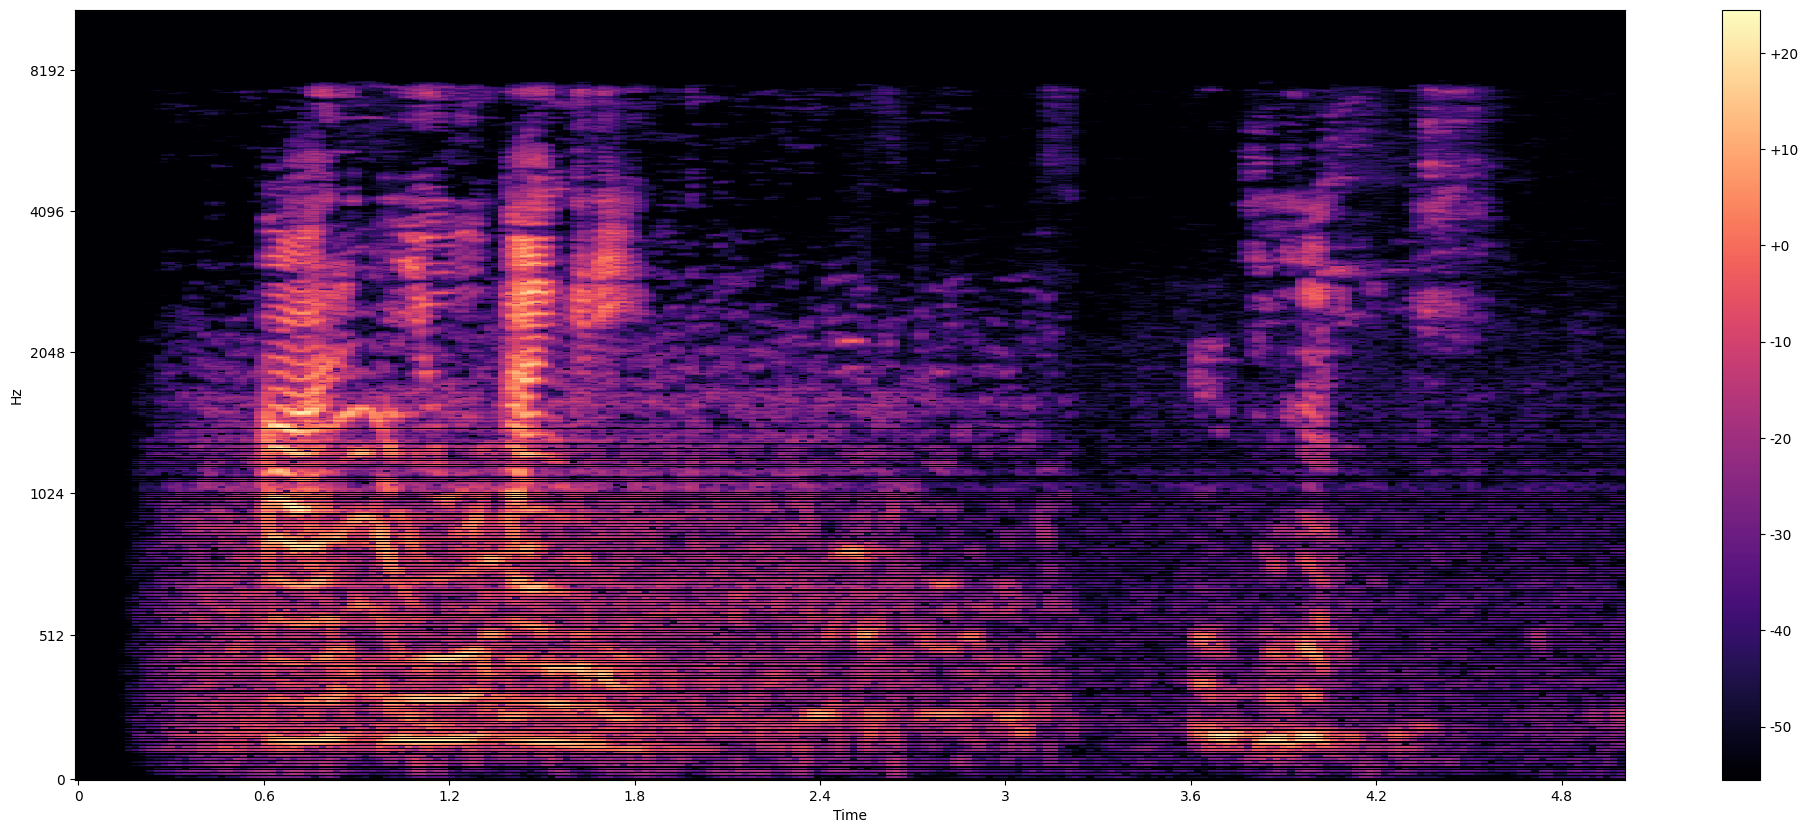

In [249]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [250]:
res = librosa.feature.inverse.mel_to_audio(mel_spectrogram)

In [251]:
sf.write('sound9.wav', res, 21000)

In [252]:
import speech_recognition as sr
r = sr.Recognizer()
with sr.AudioFile('sound9.wav') as source:
    audio_data = r.record(source)
    a = r.recognize_google(audio_data)
    a = a.lower()
    print(a)

are you angry


In [253]:
def func():
    isl_gif=['address','ahemdabad','all' ,'any questions','are you angry','are you hungry','assam','august','banana','banaras',
             'banglore','be careful','bridge','cat','christmas','church','clinic','dasara','december','did you finish homework',
             'do you have money','do you want something to drink','do you watch TV','dont worry','flower is beautiful',
             'good afternoon','good morning','good question','grapes','hello','hindu','hyderabad','i am a clerk','i am fine',
             'i am sorry','i am thinking','i am tired','i go to a theatre','i had to say something but i forgot',
             'i like pink colour','i love to shop','job','july','june','karnataka','kerala','krishna','lets go for lunch',
             'mango','may','mile','mumbai','nagpur','nice to meet you','open the door','pakistan','please call me later',
             'police station','post office','pune','punjab','saturday','shall i help you','shall we go together tomorrow','shop'
            ,'sign language interpreter','sit down','stand up','take care','temple','there was traffic jam','thursday','toliet',
            'tomato','tuesday','usa','village','wednesday','what is the problem','what is todays date','what is your father do'
            ,'what is your name','whats up','where is the bathroom','where is the police station','you are wrong']
    arr=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    if(a in isl_gif):
        class ImageLabel(tk.Label):
            def load(self, im):
                if isinstance(im, str):
                    im = Image.open(im)
                    self.loc = 0
                    self.frames = []
                try:
                    for i in count(1):
                        self.frames.append(ImageTk.PhotoImage(im.copy()))
                        im.seek(i)
                except EOFError:
                    pass
                try:
                    self.delay = im.info['duration']
                except:
                    self.delay = 100
                if len(self.frames) == 1:
                    self.config(image=self.frames[0])
                else:
                    self.next_frame()

            def next_frame(self):
                if self.frames:
                    self.loc += 1
                    self.loc %= len(self.frames)
                    self.config(image=self.frames[self.loc])
                    self.after(self.delay, self.next_frame)
        root = tk.Tk()
        lbl = ImageLabel(root)
        lbl.pack()
        lbl.load(r'ISL_Gifs/{0}.gif'.format(a))
        root.mainloop()
    else:
        for i in range(len(a)):
            if(a[i] in arr):               
                ImageAddress = 'letters/'+a[i]+'.jpg'
                ImageItself = Image.open(ImageAddress)
                ImageNumpyFormat = np.asarray(ImageItself)
                plt.imshow(ImageNumpyFormat)
                plt.draw()
                plt.pause(0.1)
            else:
                plt.pause(2)

In [254]:
image = "signlang.png"
msg = "Speech to text converter"
choices = ["Live Voice","All Done!"] 
reply = buttonbox(msg,image=image,choices=choices)
if reply ==choices[0]:
    func()